Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
import glob
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers.normalization import BatchNormalization

In [ ]:
## If you are using the data by mounting the google drive, use the following :
## from google.colab import drive
## drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [10]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("C:\\Users\\GAURAV AGRAWAL\\opencv\\Scripts\\DL\\Assignment Cancer\\Skin cancer ISIC The International Skin Imaging Collaboration\\Train\\")
data_dir_test = pathlib.Path("C:\\Users\\GAURAV AGRAWAL\\opencv\\Scripts\\DL\\Assignment Cancer\\Skin cancer ISIC The International Skin Imaging Collaboration\\Test\\")

In [18]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                               validation_split=0.2,
                                                               subset="training",
                                                               label_mode='int',
                                                               seed=123,
                                                               image_size=(img_height,img_width),
                                                               batch_size= batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
train_ds

<BatchDataset shapes: ((None, 180, 180, 3), (None,)), types: (tf.float32, tf.int32)>

In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,
                                                             validation_split=0.2,
                                                             subset="validation",
                                                             label_mode='int',
                                                             seed=123,
                                                             image_size=(img_height,img_width),
                                                             batch_size= batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


Understanding the training and testing data format.

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch[0,:,:,:])
  break

tf.Tensor(
[[[68.666664 50.625    50.708336]
  [77.       57.25     57.875   ]
  [81.583336 61.083336 51.375   ]
  ...
  [82.62503  57.99994  60.916626]
  [73.       56.25     55.375   ]
  [69.625015 47.624985 48.625046]]

 [[71.333336 50.041664 52.791668]
  [79.625    60.375    61.75    ]
  [87.458336 64.708336 67.125   ]
  ...
  [84.37509  58.791718 62.625153]
  [74.125    55.875    55.375   ]
  [68.41675  46.833374 47.20836 ]]

 [[74.25     56.041668 56.625   ]
  [86.       67.75     70.5     ]
  [93.625    72.125    76.45833 ]
  ...
  [87.91675  64.79178  59.291656]
  [80.5      56.75     58.875   ]
  [70.625015 51.125015 49.25    ]]

 ...

 [[46.416668 27.75     29.083334]
  [43.25     27.375    27.25    ]
  [43.791668 25.083334 24.416668]
  ...
  [33.       19.       17.333374]
  [35.       21.       17.875   ]
  [33.583344 19.24997  18.666656]]

 [[45.666668 27.       28.541666]
  [46.375    27.125    28.875   ]
  [41.       28.125    27.875   ]
  ...
  [30.166626 17.583374 14.8

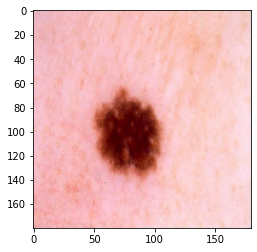

In [ ]:
for image_batch, labels_batch in train_ds:
  plt.imshow(image_batch[0,:,:,:].numpy().astype("uint8"))
  break

### Visualize the data

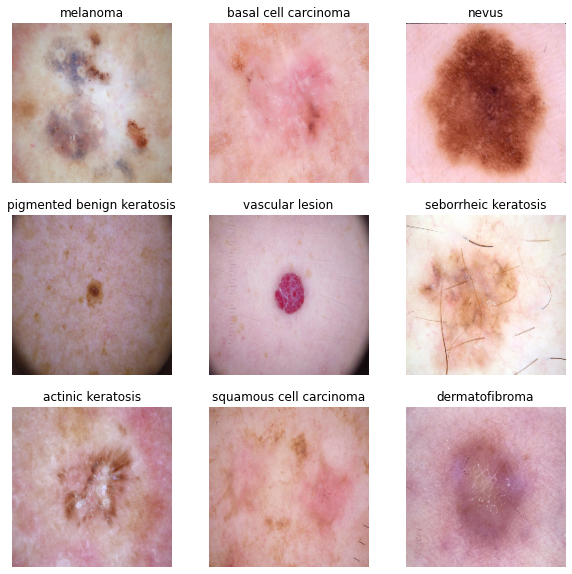

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
classes= [0,1,2,3,4,5,6,7,8]
p=1
for images, labels in train_ds.take(3):
  for i,j in enumerate(labels):
    if j in classes:
      ax = plt.subplot(3, 3, p)
      plt.imshow(images[i].numpy().astype("uint8"))
      plt.title(class_names[j])
      plt.axis("off")
      classes.remove(j)
      p=p+1

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
### Your code goes here
num_class=9

model= Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape= (img_height,img_width,3)))
model.add(layers.Conv2D(32, (3,3), padding= 'same', activation='relu'))
#model.add(BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding= 'same', activation='relu'))
#model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Conv2D(64, (3,3), padding= 'same', activation='relu'))
#model.add(BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding= 'same', activation='relu'))
#model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation= 'relu'))
model.add(layers.Dense(num_class, activation='softmax'))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 180, 180, 32)      896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 180, 180, 32)      9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 90, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 90, 90, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 90, 90, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 45, 45, 64)        0

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs= epochs)

Epoch 1/20
56/56 [==============================] - 381s 2s/step - loss: 3.3125 - accuracy: 0.2003 - val_loss: 1.9987 - val_accuracy: 0.2483
Epoch 2/20
56/56 [==============================] - 4s 76ms/step - loss: 1.9086 - accuracy: 0.2638 - val_loss: 1.6574 - val_accuracy: 0.3893
Epoch 3/20
56/56 [==============================] - 4s 77ms/step - loss: 1.5963 - accuracy: 0.4394 - val_loss: 1.5616 - val_accuracy: 0.4787
Epoch 4/20
56/56 [==============================] - 4s 77ms/step - loss: 1.3652 - accuracy: 0.5334 - val_loss: 1.3988 - val_accuracy: 0.5056
Epoch 5/20
56/56 [==============================] - 4s 77ms/step - loss: 1.1869 - accuracy: 0.5962 - val_loss: 1.5008 - val_accuracy: 0.5145
Epoch 6/20
56/56 [==============================] - 4s 77ms/step - loss: 1.1473 - accuracy: 0.5907 - val_loss: 1.5166 - val_accuracy: 0.5168
Epoch 7/20
56/56 [==============================] - 4s 78ms/step - loss: 0.9615 - accuracy: 0.6601 - val_loss: 1.7207 - val_accuracy: 0.5235
Epoch 8/20
56

### Visualizing training results

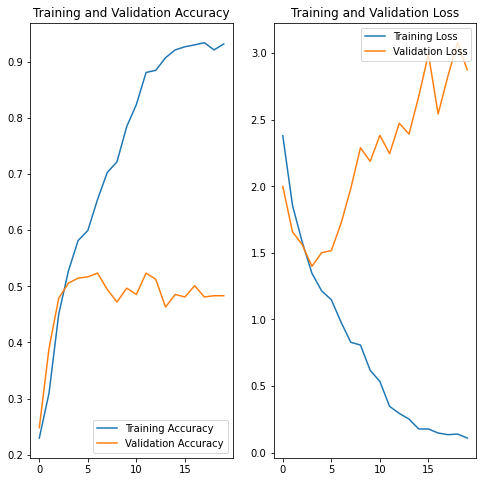

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### From the above plot it can be clearly seen that the model is overfitting due to large gap in between train and validation accuracy.

In [ ]:
# After analysing the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 

data_aug= Sequential()
data_aug.add(layers.experimental.preprocessing.RandomFlip('horizontal', input_shape= (img_height,img_width,3)))
data_aug.add(layers.experimental.preprocessing.RandomRotation(0.1))
data_aug.add(layers.experimental.preprocessing.RandomZoom(0.1))


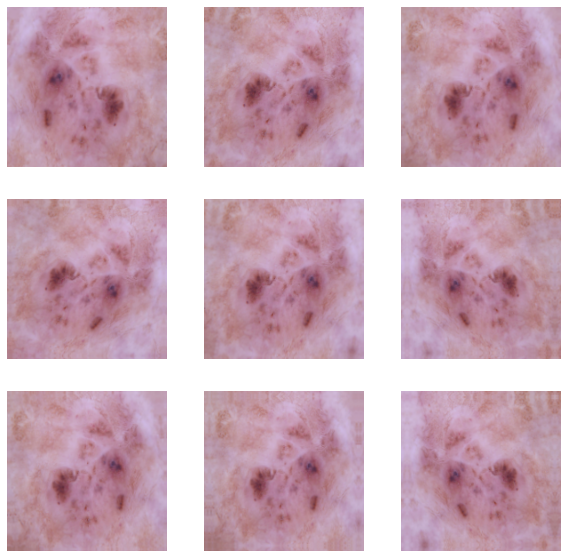

In [ ]:
# visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(10,10))
for img,lbl in train_ds.take(1):
  for i in range(9):
    aug_img= data_aug(img)
    ax= plt.subplot(3,3,i+1)
    plt.imshow(aug_img[0].numpy().astype('uint8'))
    plt.axis('off')


### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

num_class=9

model= Sequential()
model.add(data_aug)
model.add(layers.experimental.preprocessing.Rescaling(1./255))

model.add(layers.Conv2D(16, (3,3), padding= 'same', activation='relu'))
model.add(layers.Conv2D(16, (3,3), padding= 'same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Conv2D(64, (3,3), padding= 'same', activation='relu'))
model.add(layers.Conv2D(64, (3,3), padding= 'same', activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))

model.add(layers.Flatten())
model.add(layers.Dense(256, activation= 'relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_class, activation='softmax'))

### Compiling the model

In [ ]:
### choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_1 (Sequential)    (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 180, 180, 16)      448       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 180, 180, 16)      2320      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 90, 90, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 90, 90, 64)       

### Training the model

In [ ]:
## for 20 epochs
history = model.fit(train_ds, validation_data=val_ds, epochs=20)

Epoch 1/20
56/56 [==============================] - 5s 67ms/step - loss: 3.9560 - accuracy: 0.1708 - val_loss: 2.0400 - val_accuracy: 0.1879
Epoch 2/20
56/56 [==============================] - 4s 63ms/step - loss: 1.9761 - accuracy: 0.2473 - val_loss: 1.9709 - val_accuracy: 0.3266
Epoch 3/20
56/56 [==============================] - 4s 63ms/step - loss: 1.8627 - accuracy: 0.3110 - val_loss: 1.6650 - val_accuracy: 0.4362
Epoch 4/20
56/56 [==============================] - 4s 63ms/step - loss: 1.7638 - accuracy: 0.3550 - val_loss: 1.6257 - val_accuracy: 0.4452
Epoch 5/20
56/56 [==============================] - 4s 63ms/step - loss: 1.6944 - accuracy: 0.3939 - val_loss: 1.5698 - val_accuracy: 0.4586
Epoch 6/20
56/56 [==============================] - 4s 63ms/step - loss: 1.6366 - accuracy: 0.4074 - val_loss: 1.5601 - val_accuracy: 0.4743
Epoch 7/20
56/56 [==============================] - 4s 63ms/step - loss: 1.6110 - accuracy: 0.4392 - val_loss: 1.5329 - val_accuracy: 0.4743
Epoch 8/20
56

### Visualizing the results

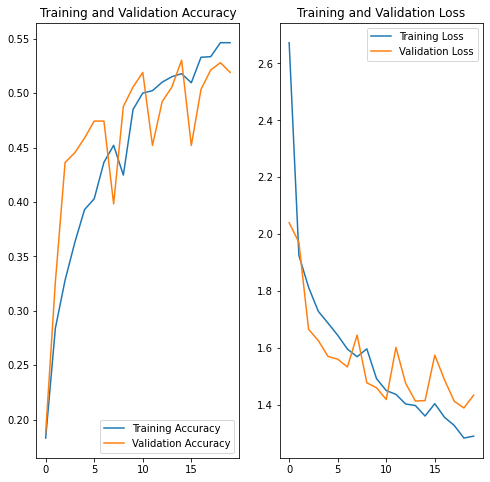

In [ ]:
epochs=20
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

### As compared to previous model, the current model is now cutting the overfitting part. Now model is not overfitted but still accuracy is low for both training and validation data.

#### Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [ ]:
image_count_class = [ len(list(data_dir_train.glob( x + '/*.jpg'))) for x in class_names ] 
print(image_count_class)

[114, 376, 95, 438, 357, 462, 77, 181, 139]


In [ ]:
df= pd.DataFrame(zip(class_names,image_count_class), columns= ['class_name','frequency'])
df

,class_name,frequency
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


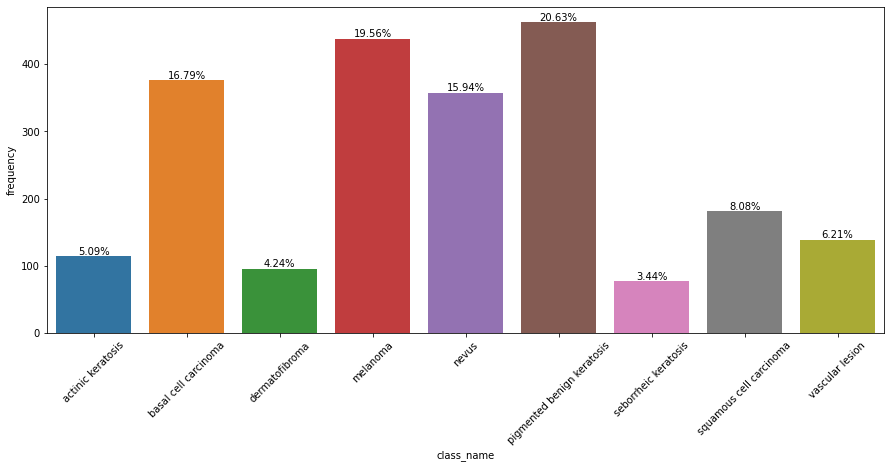

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,6))
ax= sns.barplot(x="class_name", y= "frequency", data= df)
plt.xticks(rotation=45)
for p in ax.patches:
  x=p.get_bbox().get_points()[:,0]
  y=p.get_bbox().get_points()[1,1]
  ax.annotate('{:.2f}%'.format((y/sum(image_count_class))*100), (x.mean(), y), ha='center', va='bottom')
plt.show()

#### - Which class has the least number of samples?  
The answer is **"seborrheic keratosis"**.

#### - Which classes dominate the data in terms proportionate number of samples? 
The answer is **"pigmented benign keratosis".**


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [ ]:
path_to_training_dataset= ("gdrive/MyDrive/AIML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")

import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to gdrive/MyDrive/AIML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F0156DE2588>: 100%|██████████| 500/500 [00:19<00:00, 25.35 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F015A78A0B8>:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 376 image(s) found.
Output directory set to gdrive/MyDrive/AIML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0156D9C160>: 100%|██████████| 500/500 [00:19<00:00, 25.14 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 95 image(s) found.
Output directory set to gdrive/MyDrive/AIML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F03409B1358>: 100%|██████████| 500/500 [00:20<00:00, 24.99 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to gdrive/MyDrive/AIML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=2048x1536 at 0x7F0156DB2F98>: 100%|██████████| 500/500 [01:35<00:00,  5.25 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to gdrive/MyDrive/AIML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7F015A693D30>: 100%|██████████| 500/500 [01:27<00:00,  5.74 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0156D86550>:   0%|          | 1/500 [00:00<01:15,  6.64 Samples/s]

Initialised with 462 image(s) found.
Output directory set to gdrive/MyDrive/AIML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F015A6AD320>: 100%|██████████| 500/500 [00:20<00:00, 24.51 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to gdrive/MyDrive/AIML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F0156E0DEF0>: 100%|██████████| 500/500 [00:43<00:00, 11.37 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0156D5FF60>:   0%|          | 1/500 [00:00<00:56,  8.90 Samples/s]

Initialised with 181 image(s) found.
Output directory set to gdrive/MyDrive/AIML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0156E42B00>: 100%|██████████| 500/500 [00:20<00:00, 24.65 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 139 image(s) found.
Output directory set to gdrive/MyDrive/AIML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0156E65550>: 100%|██████████| 500/500 [00:20<00:00, 24.47 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

2239


In [ ]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [ ]:
for class_ in class_names:
  count= len(list(data_dir_train.glob(class_ + "/output/*.jpg")))
  print("{0}-----{1}".format(class_, count))

actinic keratosis-----500
basal cell carcinoma-----500
dermatofibroma-----500
melanoma-----500
nevus-----500
pigmented benign keratosis-----500
seborrheic keratosis-----500
squamous cell carcinoma-----500
vascular lesion-----500


In [ ]:
os.path.join(data_dir_train, '*','output', '*.jpg')

'gdrive/MyDrive/AIML/Skin cancer ISIC The International Skin Imaging Collaboration/Train/*/output/*.jpg'

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

Now the data_dir_train has all the training data including the augmented 500 samples that we created.

In [ ]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = "validation",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### **Todo:** Create your model (make sure to include normalization)

In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

num_class=9

model= Sequential()
model.add(layers.experimental.preprocessing.Rescaling(1./255, input_shape= (img_height,img_width,3)))

model.add(layers.Conv2D(16, (3,3), padding= 'same', activation='relu'))
model.add(BatchNormalization())
model.add(layers.AveragePooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.50))

model.add(layers.Conv2D(16, (3,3), padding= 'same', activation='relu'))
model.add(BatchNormalization())
model.add(layers.AveragePooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.50))

model.add(layers.Conv2D(32, (3,3), padding= 'same', activation='relu'))
model.add(BatchNormalization())
model.add(layers.AveragePooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.50))

model.add(layers.Conv2D(32, (3,3), padding= 'same', activation='relu'))
model.add(BatchNormalization())
model.add(layers.AveragePooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.50))


model.add(layers.Flatten())
model.add(layers.Dense(512, activation= 'relu'))
model.add(layers.Dropout(0.6))
model.add(layers.Dense(num_class, activation='softmax'))

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_12 (Rescaling)     (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_48 (Conv2D)           (None, 180, 180, 16)      448       
_________________________________________________________________
batch_normalization_40 (Batc (None, 180, 180, 16)      64        
_________________________________________________________________
average_pooling2d_40 (Averag (None, 90, 90, 16)        0         
_________________________________________________________________
dropout_53 (Dropout)         (None, 90, 90, 16)        0         
_________________________________________________________________
conv2d_49 (Conv2D)           (None, 90, 90, 16)        2320      
_________________________________________________________________
batch_normalization_41 (Batc (None, 90, 90, 16)      

#### **Todo:**  Train your model

In [ ]:
epochs = 30
history = model.fit(train_ds, validation_data= val_ds, epochs= epochs)

Epoch 1/30
169/169 [==============================] - 5s 24ms/step - loss: 2.4525 - accuracy: 0.2899 - val_loss: 3.1160 - val_accuracy: 0.1269
Epoch 2/30
169/169 [==============================] - 4s 22ms/step - loss: 1.5931 - accuracy: 0.4225 - val_loss: 3.9626 - val_accuracy: 0.1440
Epoch 3/30
169/169 [==============================] - 4s 22ms/step - loss: 1.4522 - accuracy: 0.4552 - val_loss: 2.0718 - val_accuracy: 0.3831
Epoch 4/30
169/169 [==============================] - 4s 22ms/step - loss: 1.3069 - accuracy: 0.5039 - val_loss: 1.9392 - val_accuracy: 0.4276
Epoch 5/30
169/169 [==============================] - 4s 22ms/step - loss: 1.1985 - accuracy: 0.5651 - val_loss: 2.6003 - val_accuracy: 0.3853
Epoch 6/30
169/169 [==============================] - 4s 22ms/step - loss: 1.1810 - accuracy: 0.5692 - val_loss: 1.1078 - val_accuracy: 0.6147
Epoch 7/30
169/169 [==============================] - 4s 22ms/step - loss: 1.0567 - accuracy: 0.6154 - val_loss: 1.7226 - val_accuracy: 0.5397

#### **Todo:**  Visualize the model results

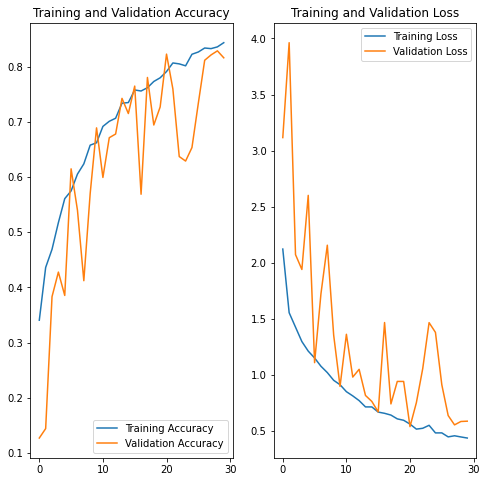

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



The accuracy has boosted significantly over the previous model. Now the training and the validation data have more than 80% accuracy with no overfitting. The class rebalance did help a lot by not letting any class sparse.